In [1]:
import pandas as pd
from sklearn.utils import resample
from matplotlib import pyplot as plt
import numpy as np

Bootstrapping is sampling with replacement from an observed data set. In essence, we are just replicating the original sample hundreds or thousands or millions of times so that we have a hypothetical population (that's just larger). In actuality, we just replace each sample after drawing; that is, we sample with replacement. This effectively creates an infinite population in which the probability of an element being drawn does not change from draw to draw. 

In [2]:
loans_income = pd.read_csv('loans_income.csv')
loans_income.head()
print(len(loans_income['x']))

50000


In [3]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income['x'])
    results.append(sample.median())
results = pd.Series(results)
print(results)

0      62000.0
1      61822.0
2      62000.0
3      62000.0
4      62000.0
        ...   
995    62000.0
996    62000.0
997    62000.0
998    62000.0
999    62000.0
Length: 1000, dtype: float64


In [4]:
print(f'original: {loans_income.x.median()}')
print(f'bias: {results.mean() - loans_income.x.median()}')
print(f'standard error: {results.std()}')

original: 62000.0
bias: -70.8804999999993
standard error: 212.82000804805824


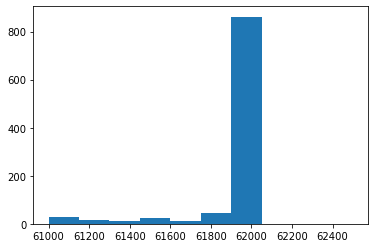

In [5]:
histo = plt.hist(results)
plt.show()

Using numpy is an alternative method to doing bootstrapping. This way appears to be more user-friendly as you can clearly state that replace=True and the size of the sample you wish to take. 
From there I then calculate the 90% confidence interval using np.percentile, I am not 100% sure if this is statistically correct. Then I plotted the results onto a histogram, showing that it is 90% certain that the mean of this sample population of 20 draws (that has been repeated 1000 times) lies within this range.  

In [6]:
means = []
for nrepeat in range(1000):
    np_sample = np.random.choice(loans_income['x'], replace=True, size=20)
    means.append(np_sample.mean())

low_p = np.percentile(means, 5)
high_p = np.percentile(means, 95)


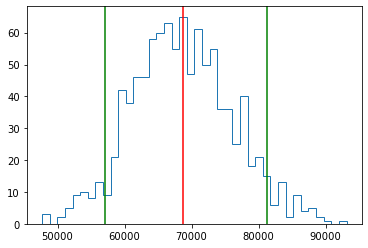

In [7]:
histo3 = plt.hist(means, histtype='step', bins=40)
plt.axvline(x=np.average(means), color='r')
plt.axvline(x=low_p, color='g')
plt.axvline(x=high_p, color='g')
plt.show()

In [8]:
means2 = []
for nrepeat in range(1000):
    np_sample = np.random.choice(loans_income['x'], replace=True, size=50000)
    means2.append(np.median(np_sample))

means2 = pd.Series(means2)
print(np.median(means2))
means2


62000.0


0      62000.0
1      62000.0
2      62000.0
3      62000.0
4      62000.0
        ...   
995    62000.0
996    62000.0
997    62000.0
998    61402.0
999    62000.0
Length: 1000, dtype: float64

In [9]:
print(f'original: {loans_income.x.median()}')
print(f'bias: {np.average(means2) - loans_income.x.median()}')
print(f'standard error: {np.std(means2)}')

original: 62000.0
bias: -73.72099999999773
standard error: 216.36012146188122


I think that this is how a confidence interval should be done, sometimes it is better to present an estimate (such as mean or median) as a range rather than a specific number (point estimate). Here I have taken a sample of 20 from the loans_income csv, then used a bootstrap to resample from this sample population 1000 times. From here I append the means of these resampled data values to a list which I then convert to a Panda Series. I then plot a histogram of these means and use percentiles to trim the ends off - to calculate a 90% percentile off each end the formula is [(100-x)/2]%. This equals (100 - 90)/2 = 5% from both ends, so we use np.percentile(results, 5) for the low and np.percentile(results,95) for the high. We can now say that 90% of the time the mean will be within this range.

In [10]:
sample_20 = np.random.choice(loans_income['x'], replace=True, size=20)


76443.5


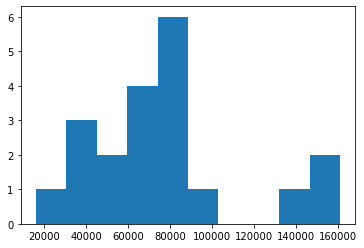

In [11]:
sample_20 = pd.Series(sample_20)
print(sample_20.mean())
plt.hist(sample_20)
plt.show()

In [34]:
results = []
for nrepeat in range(1000):
    sample = resample(sample_20)
    results.append(sample.mean())
results = sorted(results)
results = pd.Series(results)
print(results)

0       49414.20
1       49842.65
2       51114.50
3       51437.10
4       52335.20
         ...    
995     98251.40
996    101092.65
997    101800.00
998    102171.55
999    107387.10
Length: 1000, dtype: float64


In [36]:
print(results.mean())
low_p = np.percentile(results, 5)
high_p = np.percentile(results, 95)

print(low_p)
print(high_p)

76182.76165
63148.7375
90410.4875


In [40]:
print(results[50])
print(results[950])

63157.25
90443.5


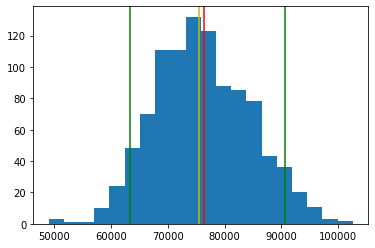

In [17]:
plt.hist(results, bins=20)
plt.axvline(sample_20.mean(), color='r')
plt.axvline(results.median(), color='y')
plt.axvline(x=low_p, color='g')
plt.axvline(x=high_p, color='g')
plt.show()

In [41]:
results = []
for nrepeat in range(1000):
    sample = np.random.choice(sample_20, size=20, replace=True)
    results.append(sample.mean())
results = pd.Series(results)
print(results)

0      72714.60
1      63193.50
2      73328.90
3      85664.60
4      96565.45
         ...   
995    83350.85
996    70936.15
997    93828.90
998    81015.45
999    77566.30
Length: 1000, dtype: float64


In [42]:
print(results.mean())
low_p = np.percentile(results, 5)
high_p = np.percentile(results, 95)

76474.21075


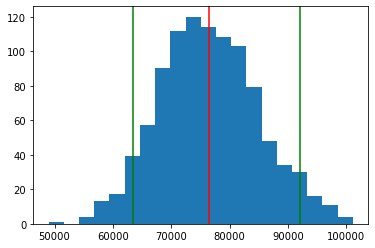

In [43]:
plt.hist(results, bins=20)
plt.axvline(sample_20.mean(), color='r')
plt.axvline(x=low_p, color='g')
plt.axvline(x=high_p, color='g')
plt.show()